# Logistic Regression

Author: Filip Kołodziejczyk

## Prerequisites

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Theoretical Introduction

$$y_i = \{0, 1\}$$
$$x_i = (x_{i1}, x_{i2}, \ldots, x_{ip})$$
$$P(y_i = 1 | x_i) = \sigma(\Beta_0 + \Beta x_i^T)$$
$$\sigma(s) = \frac{1}{1 + e^{-s}} \quad \textrm{(sigmoid function)}$$
$$P(y_i = 0 | x_i) = 1 - P(y_i = 1 | x_i)$$
$$P(y_i = 1 | x_i) \geq 0.5 \quad \Rightarrow \quad \textrm{assign } x_i \textrm{ to class 1}$$
$$P(y_i = i | x_i) \geq 0.5 \quad \Leftrightarrow \quad x_i^T \Beta + \Beta_0 \gt 0 \quad \textrm{(linearity)}$$
$$L(\beta, \beta_0) = \sum_{i=1}^n log P(y_i | x_i) = \sum_{i=1}^n y_i log \sigma(\beta_0 + \beta x_i^T) + (1 - y_i) log (1 - \sigma(\beta_0 + \beta x_i^T))$$
$$\hat{\Beta}, \hat{\Beta_0} = \argmax_{\beta, \beta_0} [-L(\beta, \beta_0)]$$
$$\hat{\Beta}, \hat{\Beta_0} = \argmax_{\beta, \beta_0} [-L(\beta, \beta_0) + \lambda ||\beta||_2^2] \quad \textrm{(L2 regularization)}$$


## Task 1

Dataset earthquake.txt corresponds to problem of prediction of seismic shocks (volcanic eruptions and nuclear explosions) (variable popn) based on two variables: 
- body (deep wave magnitude)
- surface (surface wave magnitude).

In [101]:
path = "earthquake.txt"
data = pd.read_csv(path, sep=r"\s+", header="infer")
labels = {
    'equake': 'volcanic eruption',
    'explosn': 'nuclear explosion',
}
data['popn'] = data['popn'].replace(labels)
data.head()

,popn,body,surface
0,volcanic eruption,5.60,4.25
1,volcanic eruption,5.18,3.93
2,volcanic eruption,6.31,6.30
3,volcanic eruption,5.36,4.49
4,volcanic eruption,5.96,6.39


### Task 1.1

Make scatterplot for variables body and surface. Mark classes corresponding to observations.

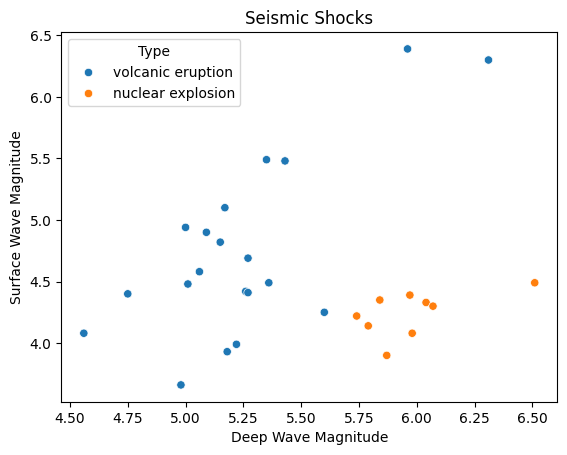

In [102]:
sns.scatterplot(data=data, x='body', y='surface', hue='popn')
plt.title('Seismic Shocks')
plt.xlabel('Deep Wave Magnitude')
plt.ylabel('Surface Wave Magnitude')
plt.legend(title='Type')
plt.show()

### Task 1.2

Fit logistic model without regularization, print estimated coefficients, estimated probabilities and compute log-likelihood function.

Intercept: [135.04766]
Coefficients: [[-111.91608  117.54516]]
Estimated Probabilities (for clasification as volcanic eruption)
: [0.99962 1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      0.99964 1.      1.      1.      1.      1.
 1.      1.      0.      0.      0.00073 0.      0.      0.      0.00001
 0.      0.     ]
Log-likelihood: -0.00173


/opt/homebrew/Caskroom/miniconda/base/envs/advanced-ml/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


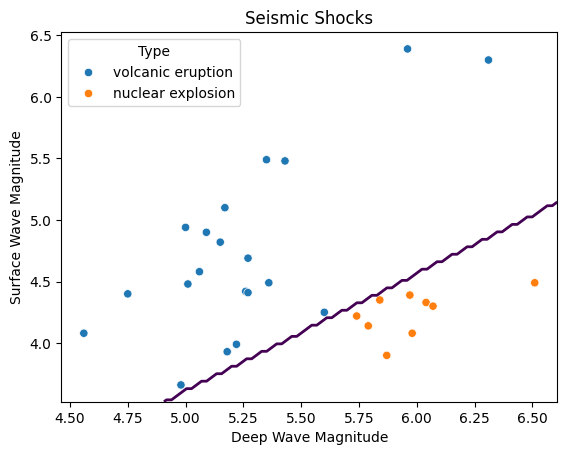

In [103]:
X = data[['body', 'surface']]
y = np.array([1 if popn == 'volcanic eruption' else 0 for popn in data['popn']])

model = LogisticRegression(penalty=None)
model.fit(X, y)

print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

proba = model.predict_proba(X)
np.set_printoptions(precision=5, suppress=True)
print(f'Estimated Probabilities (for clasification as volcanic eruption)\n: {proba[:, 1]}')

proba = proba.clip(0.00001, 0.99999) # Avoid log(0) and log(1)
log_likelihood = np.sum(y * np.log(proba[:, 1]) + (1 - y) * np.log(1 - proba[:, 1]))
print(f'Log-likelihood: {log_likelihood:.5f}')

sns.scatterplot(data=data, x='body', y='surface', hue='popn')
plt.title('Seismic Shocks')
plt.xlabel('Deep Wave Magnitude')
plt.ylabel('Surface Wave Magnitude')
plt.legend(title='Type')

x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2)
plt.show()

### Task 1.3

Fit logistic model with ℓ2 regularization, print estimated coefficients, estimated probabilities and compute log-likelihood function.

Intercept: [7.46938]
Coefficients: [[-2.16923  1.18171]]
Estimated Probabilities (for clasification as volcanic eruption)
: [0.58516 0.70618 0.77318 0.75918 0.89012 0.78286 0.90731 0.91413 0.91306
 0.86939 0.77711 0.82917 0.72942 0.70288 0.87049 0.90189 0.88013 0.91676
 0.92135 0.89718 0.3738  0.42722 0.48539 0.45062 0.34179 0.20646 0.50121
 0.33599 0.35058]
Log-likelihood: -8.42508


/opt/homebrew/Caskroom/miniconda/base/envs/advanced-ml/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


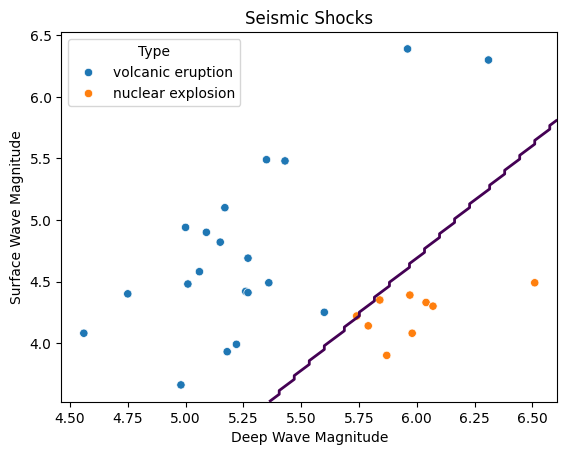

In [104]:
model = LogisticRegression(penalty='l2')
model.fit(X, y)

print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

proba = model.predict_proba(X)
print(f'Estimated Probabilities (for clasification as volcanic eruption)\n: {proba[:, 1]}')

proba = proba.clip(0.00001, 0.99999) # Avoid log(0) and log(1)
log_likelihood = np.sum(y * np.log(proba[:, 1]) + (1 - y) * np.log(1 - proba[:, 1]))
print(f'Log-likelihood: {log_likelihood:.5f}')

sns.scatterplot(data=data, x='body', y='surface', hue='popn')
plt.title('Seismic Shocks')
plt.xlabel('Deep Wave Magnitude')
plt.ylabel('Surface Wave Magnitude')
plt.legend(title='Type')

x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2)
plt.show()

## Task 2

### Task 2.1

Generate data from logistic model:
$$y_i \sim Bern(p_i)$$
$$p_i = \frac{1}{1 + \exp{[-(\beta_0 + \beta_1 x_{i1} + \dots + \beta_5 x_{i5})}]}$$
for $i = 1, \dots, n$, $x_{i1}, \dots, x_{i5} \sim N(0,1)$, $n = 50$.  
Parameters $\beta_0 = 0.5, \beta_1 = \dots = \beta_5 = 1$.  
Fit logistic model and calculate the estimators of coefficients $\hat{\beta} = (\hat{\beta_1}, \dots, \hat{\beta_5})$.  
Repeat the experiment $L = 100$ times and compute MSE ($||\cdot||$ is Euclidean norm).
$$MSE = E[||\hat{\beta} - \beta||^2]$$

In [105]:
b0 = 0.5
b = np.ones(5)
L = 100


def generate_data(n=50) -> tuple[np.array, np.array]:
    def _p(x: np.array) -> float:
        denom = 1 + np.exp(-(b0 + x @ b))
        return 1 / denom

    def _y(p: float) -> int:
        return np.random.binomial(1, p)

    X = np.random.normal(0, 1, size=(n, 5))
    y = _y(_p(X))
    return X, y


def experiment(X: np.array, y: np.array, C: int = 1) -> np.array:
    model = LogisticRegression(C=C)
    model.fit(X, y)
    return mean_squared_error(b[:(X.shape[1])], model.coef_[0])


data = [generate_data() for _ in range(L)]
X = np.array([d[0] for d in data])
y = np.array([d[1] for d in data])

MSEs = np.array([experiment(X[i], y[i]) for i in range(L)])
mean = np.mean(MSEs)
print(f"Mean Squared Error: {mean:.5f}")

Mean Squared Error: 0.16621


### Task 2.1

Repeat the experiment for $n = 50, 60, 70, 80, 90, 100, 200, 300 . . . , 1000$ and make a plot showing how $MSE$ depends on $n$.

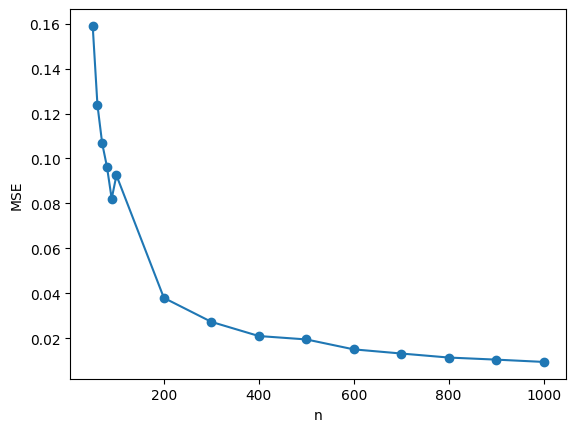

In [106]:
n_values = np.concatenate([np.arange(50, 100, 10), np.arange(100, 1001, 100)])

X_list = []
y_list = []
for n in n_values:
    data = [generate_data(n) for _ in range(L)]
    X_list.append(np.array([d[0] for d in data]))
    y_list.append(np.array([d[1] for d in data]))

mse_means = []
for X, y in zip(X_list, y_list):
    MSEs = np.array([experiment(X[i], y[i]) for i in range(L)])
    mse_means.append(np.mean(MSEs))

# plot
plt.plot(n_values, mse_means, marker='o')
plt.xlabel('n')
plt.ylabel('MSE')
plt.show()

### Task 2.2

Using the same datasets, train the model based only on 3 variables: $x_{i1}, x_{i2}, x_{i3}$ and draw the analogous curve showing how $MSE$ for $\beta = (\beta_1, \beta_2, \beta_3)$ depends on $n$.

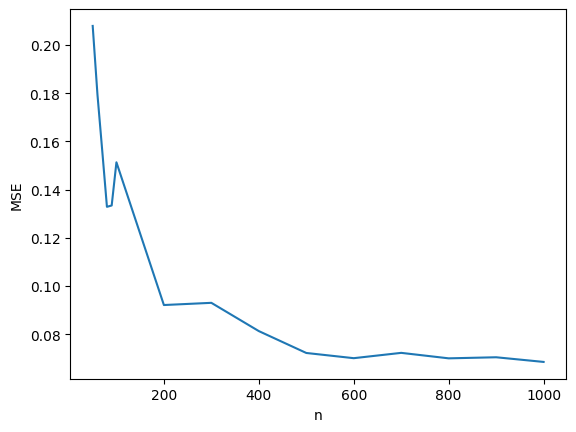

In [107]:
mse_means_2 = []
# Now traing only based on 3 features
for X, y in zip(X_list, y_list):
    MSEs = np.array([experiment(X[i][:, :3], y[i]) for i in range(L)])
    mse_means_2.append(np.mean(MSEs))

# plot
plt.plot(n_values, mse_means_2)
plt.xlabel('n')
plt.ylabel('MSE')
plt.show()

### Task 2.3

Plot both curves together and save the figure in pdf file to **SimulationResults.pdf**.

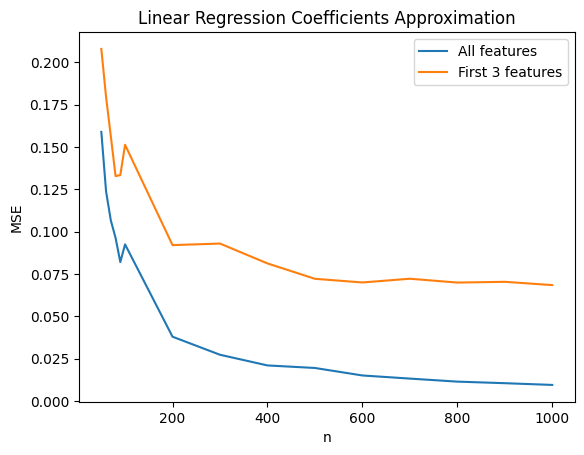

In [108]:
filename = "SimulationResults.pdf"

# Plot mse_values and mse_values_2 on the same plot
plt.plot(n_values, mse_means, label='All features')
plt.plot(n_values, mse_means_2, label='First 3 features')
plt.xlabel('n')
plt.ylabel('MSE')
plt.title('Linear Regression Coefficients Approximation')
plt.legend()
plt.savefig(filename)
plt.show()